# Project 3: GDP versus life expectancy
by Marcelo José Rovai, 15 May 2018

Based on work by Michel Wermelinger, 27 August 2015, updated 5 April 2016 and 18 October 2017, minor edits 20 December 2017
This is the project notebook for Part 3 of The Open University's Learn to code for Data Analysis course.


Richer countries can afford to invest more on healthcare, on work and road safety, and other measures that reduce mortality. On the other hand, richer countries may have less healthy lifestyles. Is there any relation between the wealth of a country and the life expectancy of its inhabitants?
The following analysis checks whether there is any correlation between the total gross domestic product (GDP) of a country in 2013 and the life expectancy of people born in that country in 2016.

## Dataset

Getting the data
Initiallly, three datasets of the World Bank are considered. One dataset, available at http://data.worldbank.org/indicator/NY.GDP.MKTP.CD, lists the GDP of the world's countries in current US dollars, for various years. The use of a common currency allows us to compare GDP values across countries. The other dataset, available at http://data.worldbank.org/indicator/SP.DYN.LE00.IN, lists the life expectancy of the world's countries. The datasets were downloaded as CSV files in March 2016.
https://data.worldbank.org/indicator/SP.POP.TOTL, lists the population.

Further on the analysis, a 4th dataset was included:
https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD, that list GDP per capita, PPP (current international $)

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *

In [3]:
from pandas_datareader.wb import download

### 1. Getting the 3 innitial datasets: GDP, Life Expetancy and Population

In [4]:
GDP_INDICATOR = 'SP.POP.TOTL'
YEAR = 2016

popWB = download(indicator=GDP_INDICATOR, country='all', start=YEAR, end=YEAR)
popWB.shape # (264, 1)

(264, 1)

In [5]:
popWB.head()

,,SP.POP.TOTL
country,year,
Arab World,2016,4.064527e+08
Caribbean small states,2016,7.245472e+06
Central Europe and the Baltics,2016,1.029913e+08
Early-demographic dividend,2016,3.170658e+09
East Asia & Pacific,2016,2.298727e+09


In [6]:
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
YEAR = 2016

gdpWB = download(indicator=GDP_INDICATOR, country='all', start=YEAR, end=YEAR)
gdpWB.shape # (264, 1)

(264, 1)

In [7]:
gdpWB.head()

,,NY.GDP.MKTP.CD
country,year,
Arab World,2016,2.504703e+12
Caribbean small states,2016,6.670736e+10
Central Europe and the Baltics,2016,1.312192e+12
Early-demographic dividend,2016,1.040188e+13
East Asia & Pacific,2016,2.248997e+13


In [8]:
LIFE_INDICATOR = 'SP.DYN.LE00.IN'
YEAR = 2016

lifeWB = download(indicator=LIFE_INDICATOR, country='all', start=YEAR, end=YEAR)
lifeWB.shape # (264, 1)

(264, 1)

In [9]:
lifeWB.head()

,,SP.DYN.LE00.IN
country,year,
Arab World,2016,71.198456
Caribbean small states,2016,73.192408
Central Europe and the Baltics,2016,76.603177
Early-demographic dividend,2016,69.766271
East Asia & Pacific,2016,75.395732


### 2. Cleaning

#### Including index, starting from zero

In [10]:
gdpReset = gdpWB.reset_index()
lifeReset = lifeWB.reset_index()
popReset = popWB.reset_index()

In [11]:
gdpReset.head()

,country,year,NY.GDP.MKTP.CD
0,Arab World,2016,2.504703e+12
1,Caribbean small states,2016,6.670736e+10
2,Central Europe and the Baltics,2016,1.312192e+12
3,Early-demographic dividend,2016,1.040188e+13
4,East Asia & Pacific,2016,2.248997e+13


In [12]:
lifeReset.head()

,country,year,SP.DYN.LE00.IN
0,Arab World,2016,71.198456
1,Caribbean small states,2016,73.192408
2,Central Europe and the Baltics,2016,76.603177
3,Early-demographic dividend,2016,69.766271
4,East Asia & Pacific,2016,75.395732


In [13]:
popReset.head()

,country,year,SP.POP.TOTL
0,Arab World,2016,4.064527e+08
1,Caribbean small states,2016,7.245472e+06
2,Central Europe and the Baltics,2016,1.029913e+08
3,Early-demographic dividend,2016,3.170658e+09
4,East Asia & Pacific,2016,2.298727e+09


#### Looking for the row where single countries data start

In [14]:
popReset[30:50] # Afghanistan starts at 47 

,country,year,SP.POP.TOTL
30,Middle East & North Africa (IDA & IBRD countries),2016,3.691675e+08
31,Middle income,2016,5.594800e+09
32,North America,2016,3.594575e+08
33,Not classified,2016,NaN
34,OECD members,2016,1.289873e+09
35,Other small states,2016,2.999456e+07
36,Pacific island small states,2016,2.388875e+06
37,Post-demographic dividend,2016,1.102651e+09
38,Pre-demographic dividend,2016,8.792925e+08
39,Small states,2016,3.962891e+07


==> First Single Country data starts at row 47 (Afganistan)

#### Getting countries dataset only

In [15]:
gdpCountries = gdpReset[47:]
lifeCountries = lifeReset[47:]
popCountries = popReset[47:]
gdpCountries.shape # 217 countries 

(217, 3)

In [16]:
gdpCountries.head()

,country,year,NY.GDP.MKTP.CD
47,Afghanistan,2016,1.946902e+10
48,Albania,2016,1.186387e+10
49,Algeria,2016,1.590491e+11
50,American Samoa,2016,6.580000e+08
51,Andorra,2016,2.858518e+09


#### Taking out countries with No Data  

In [17]:
gdpData = gdpCountries.dropna()
gdpData.shape

(191, 3)

In [18]:
lifeData = lifeCountries.dropna()
lifeData.shape

(199, 3)

In [19]:
popData = popCountries.dropna()
popData.shape

(216, 3)

####  The year column is discarded.

In [20]:
COUNTRY = 'country'

In [21]:
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
headings = [COUNTRY, GDP_INDICATOR]
gdpClean = gdpData[headings]

In [22]:
LIFE_INDICATOR = 'SP.DYN.LE00.IN' 
headings = [COUNTRY, LIFE_INDICATOR]
lifeClean = lifeData[headings]

In [23]:
POP_INDICATOR = 'SP.POP.TOTL' 
headings = [COUNTRY, POP_INDICATOR]
popClean = popData[headings]

### 3. Joining and Transforming data

#### Defining functions to be used on transforming data

In [24]:
# Function to return rounded Population in 'thousants'
def roundTo1000 (value):
    return round(value/1000)

In [25]:
# Function to return rounded values in millions
def roundToMillions (value):
    return round(value / 1000000)

In [26]:
gdpCleanRounded = gdpClean [GDP_INDICATOR].apply(roundToMillions)
gdpCleanRounded.head()

47     19469
48     11864
49    159049
50       658
51      2859
Name: NY.GDP.MKTP.CD, dtype: int64

In [27]:
gdpVsLifeAll = merge(gdpClean, lifeClean, on=COUNTRY, how='inner')
gdpVsLifeAll.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN
0,Afghanistan,1.946902e+10,63.673
1,Albania,1.186387e+10,78.345
2,Algeria,1.590491e+11,76.078
3,Angola,9.533511e+10,61.547
4,Antigua and Barbuda,1.460145e+09,76.364


In [28]:
popVsgdpVsLifeAll = merge(popClean, gdpVsLifeAll, on=COUNTRY, how='inner')
popVsgdpVsLifeAll.head()

,country,SP.POP.TOTL,NY.GDP.MKTP.CD,SP.DYN.LE00.IN
0,Afghanistan,34656032.0,1.946902e+10,63.673
1,Albania,2876101.0,1.186387e+10,78.345
2,Algeria,40606052.0,1.590491e+11,76.078
3,Angola,28813463.0,9.533511e+10,61.547
4,Antigua and Barbuda,100963.0,1.460145e+09,76.364


In [29]:
popVsgdpVsLifeAll['pop (1000)'] = popVsgdpVsLifeAll['SP.POP.TOTL'].apply(roundTo1000)

In [30]:
popVsgdpVsLifeAll['gdp (USD M)'] = popVsgdpVsLifeAll['NY.GDP.MKTP.CD'].apply(roundToMillions)

In [31]:
popVsgdpVsLifeAll['life (years)'] = popVsgdpVsLifeAll['SP.DYN.LE00.IN'].apply(round)

In [32]:
dsWB_2016 = popVsgdpVsLifeAll[['country', 'pop (1000)', 'gdp (USD M)', 'life (years)']]

In [33]:
dsWB_2016.head()

,country,pop (1000),gdp (USD M),life (years)
0,Afghanistan,34656,19469,64
1,Albania,2876,11864,78
2,Algeria,40606,159049,76
3,Angola,28813,95335,62
4,Antigua and Barbuda,101,1460,76


### 4. Data Analysis 

In [34]:
# Define constants to better analyse data
POP = 'pop (1000)'
GDP = 'gdp (USD M)'
LIFE = 'life (years)'

#### Calculating the correlation

To measure if the life expectancy and the GDP grow together, the Spearman rank correlation coefficient is used. It is a number from -1 (perfect inverse rank correlation: if one indicator increases, the other decreases) to 1 (perfect direct rank correlation: if one indicator increases, so does the other), with 0 meaning there is no rank correlation. A perfect correlation doesn't imply any cause-effect relation between the two indicators. A p-value below 0.05 means the correlation is statistically significant.

The Spearman rank correlation coefficient between GDP and Life Expectancy, and the corresponding p-value are calculated as follows.

In [35]:
from scipy.stats import spearmanr

gdpColumn = dsWB_2016[GDP]
lifeColumn = dsWB_2016[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.5320530385413912
It is statistically significant.


The Spearman rank correlation coefficient between GDP and population, and the corresponding p-value are calculated as follows.

In [36]:
from scipy.stats import spearmanr

gdpColumn = dsWB_2016[GDP]
popColumn = dsWB_2016[POP]
(correlation, pValue) = spearmanr(gdpColumn, popColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.7118285793505145
It is statistically significant.


#### Showing the data

Measures of correlation can be misleading, so it is best to see the overall picture with a scatterplot. The GDP axis uses a logarithmic scale to better display the vast range of GDP values, from a few million to several billion (million of million) dolars.

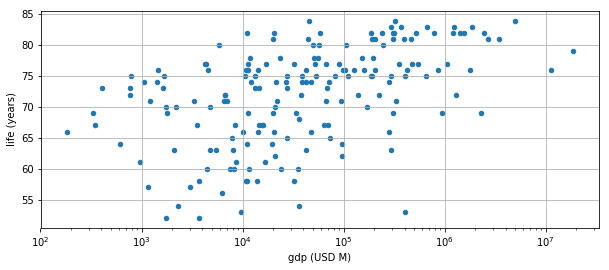

In [37]:
%matplotlib inline
dsWB_2016.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize = (10, 4))

The above plot shows there is a certain degree of correlation but not that clear. There are few rich countries with low life expectancy, poor countries with high expectancy, and countries with around 10 thousand (10ˆ4) million dollars GDP have almost the full range of values, from below 55 to alomst 85 years. Towards the lower and higher end of GDP, the variation diminishes. Above 100 Billion Dollars of GDP (3rd tick mark to the right of 10ˆ5), most countries have an expectancy of 70 years or more, whilst below that threshold most countries' life expectancy is below 70 years.


Let's also analyse GDP vs Population

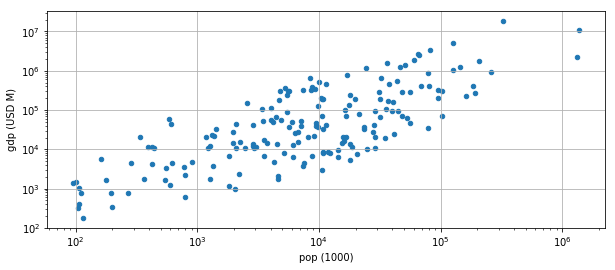

In [38]:
dsWB_2016.plot(x=POP, y=GDP, kind='scatter', grid=True, logx=True, logy=True, figsize = (10, 4))

Here there is a vert=y clear correlation between Population and GDP, what make a lot of sense. So, analysing Total GDP with Life Expectancy shoild not be the best way to fu=ind a correlation. Let's try to compare Life Expectancy with GDP per capta and see if there is more correlation between them.

#### Including GDP per capta on dataset

In [39]:
# Reading Word Bank data
GDP_PCAP_INDICATOR = 'NY.GDP.PCAP.PP.CD'
YEAR = 2016

gdpPcWB = download(indicator=GDP_PCAP_INDICATOR, country='all', start=YEAR, end=YEAR)
gdpPcWB.shape # (264, 1)

(264, 1)

In [40]:
gdpPcWB.head()

,,NY.GDP.PCAP.PP.CD
country,year,
Arab World,2016,16726.722185
Caribbean small states,2016,15370.634898
Central Europe and the Baltics,2016,26851.168541
Early-demographic dividend,2016,9175.644421
East Asia & Pacific,2016,17025.390679


In [41]:
# Including numeric index starting with zero
gdpPcReset = gdpPcWB.reset_index()
gdpPcReset.head()

,country,year,NY.GDP.PCAP.PP.CD
0,Arab World,2016,16726.722185
1,Caribbean small states,2016,15370.634898
2,Central Europe and the Baltics,2016,26851.168541
3,Early-demographic dividend,2016,9175.644421
4,East Asia & Pacific,2016,17025.390679


In [42]:
# Taking out regional data (leaving only countries) 
gdpPcCountries = gdpPcReset[47:]
gdpPcCountries.head()

,country,year,NY.GDP.PCAP.PP.CD
47,Afghanistan,2016,1944.117005
48,Albania,2016,11540.025561
49,Algeria,2016,15013.296380
50,American Samoa,2016,NaN
51,Andorra,2016,NaN


In [43]:
# Taking out countries with No Data
gdpPcData = gdpPcCountries.dropna()
gdpPcData.shape

(183, 3)

In [44]:
# take out year column
gdpPcClean = gdpPcData[['country', GDP_PCAP_INDICATOR]]
gdpPcClean.head()

,country,NY.GDP.PCAP.PP.CD
47,Afghanistan,1944.117005
48,Albania,11540.025561
49,Algeria,15013.296380
52,Angola,6454.135370
53,Antigua and Barbuda,22661.488536


In [45]:
# Transforming
gdpPcClean['gdpPc'] = gdpPcClean['NY.GDP.PCAP.PP.CD'].apply(round) 

In [46]:
gdpPcClean.head()

,country,NY.GDP.PCAP.PP.CD,gdpPc
47,Afghanistan,1944.117005,1944
48,Albania,11540.025561,11540
49,Algeria,15013.296380,15013
52,Angola,6454.135370,6454
53,Antigua and Barbuda,22661.488536,22661


In [47]:
gdpPcClean = gdpPcClean[['country', 'gdpPc']]

In [48]:
gdpPcClean.head()

,country,gdpPc
47,Afghanistan,1944
48,Albania,11540
49,Algeria,15013
52,Angola,6454
53,Antigua and Barbuda,22661


In [49]:
# joint to dataset
dsWB2_2016 = merge(dsWB_2016, gdpPcClean, on='country', how='inner')
dsWB2_2016.head()

,country,pop (1000),gdp (USD M),life (years),gdpPc
0,Afghanistan,34656,19469,64,1944
1,Albania,2876,11864,78,11540
2,Algeria,40606,159049,76,15013
3,Angola,28813,95335,62,6454
4,Antigua and Barbuda,101,1460,76,22661


In [50]:
GDP_PC = 'gdpPc'

In [51]:
gdpPcColumn = dsWB2_2016[GDP_PC]
lifeColumn = dsWB2_2016[LIFE]
(correlation, pValue) = spearmanr(gdpPcColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.8471274953751101
It is statistically significant.


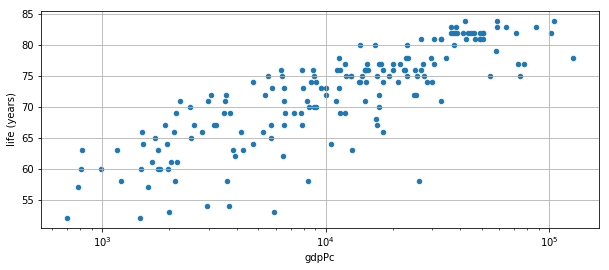

In [52]:
dsWB2_2016.plot(x=GDP_PC, y=LIFE, kind='scatter', grid=True, logx=True, logy=False, figsize = (10, 4))

There is a very high relationship between GDP Per Capta and Life expectance. 

### 5. Conclusion

Here the correlation is very clear! Countries with GDP Per Capta bellow US$10,000 will be concentrated on a range bellow 75 year of Life Expectancy,and countries with DP over this value will have a Life expectanv=cy over 70 years! 